In [1]:
import pandas as pd
column_name = ['Id','Name','Age','Weight','m0006','m0612','m1218','f0006','f0612','f1218']
df = pd.read_csv("patient_heart_rate.csv")
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#expand=True sẽ trả về một DataFrame mà mỗi cột mới sẽ chứa một phần của chuỗi đã được tách ra từ chuỗi gốc
df[['First Name','Last Name']] = df['Name'].str.split(expand = True) 
df = df.drop('Name',axis = 1) 
df.head(10)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,189lbs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Weight = df['Weight']
for i in range (0,len(Weight)):
    x = str(Weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3:]              #[start:end:step]
        float_x = float(x)
        y = int(float_x/2.2)
        #y = str(y)
        df.loc[i,'Weight'] = y
    if 'kgs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        df.loc[i,'Weight'] = float_x
        


In [4]:
df.rename(columns={'Weight':'Weight_kgs'},inplace = True)
df.head(10)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(how='all',inplace = True)
df.head(10)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scööpy,Doo
10,9.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
11,10.0,12.0,45.0,-,-,-,92,95,87,Louie,McDuck


In [6]:
df.drop_duplicates(subset=['First Name','Last Name','Age','Weight_kgs'])
df.head(10)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scööpy,Doo
10,9.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
11,10.0,12.0,45.0,-,-,-,92,95,87,Louie,McDuck


In [7]:
df['First Name'].replace({r'[^\x00-\x7F]+':''},regex = True,inplace = True)
df['Last Name'].replace({r'[^\x00-\x7F]+':''},regex = True,inplace = True)
df.head(10)

C:\Users\HKP\AppData\Local\Temp\ipykernel_12180\2124590677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['First Name'].replace({r'[^\x00-\x7F]+':''},regex = True,inplace = True)
C:\Users\HKP\AppData\Local\Temp\ipykernel_12180\2124590677.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scpy,Doo
10,9.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
11,10.0,12.0,45.0,-,-,-,92,95,87,Louie,McDuck


In [8]:
# xu ly missing value
df['Age'].fillna(df['Age'].mode()[0],inplace = True) # bang gia tri cua yeu vi
df['Weight_kgs'].fillna(df['Weight_kgs'].median(),inplace = True) # bang gia tri cua trung vi
df.head(10)

C:\Users\HKP\AppData\Local\Temp\ipykernel_12180\1663766936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0],inplace = True) # bang gia tri cua yeu vi
C:\Users\HKP\AppData\Local\Temp\ipykernel_12180\1663766936.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First Name,Last Name
0,1.0,56.0,70.0,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70.0,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,78.0,-,-,-,65,69,72,Mini,Mouse
3,4.0,52.0,78.0,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90.0,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85.0,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56.0,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78.0,78,76,75,-,-,-,Scpy,Doo
10,9.0,52.0,85.0,-,-,-,68,75,72,Huey,McDuck
11,10.0,12.0,45.0,-,-,-,92,95,87,Louie,McDuck


In [9]:
df = pd.melt(df,id_vars=['Id','Age','Weight_kgs','First Name','Last Name'],value_name='PulseRate',var_name='Gender_time').sort_values(['Id','Age','Weight_kgs','First Name','Last Name'])

In [10]:
df_temp = df['Gender_time'].str.extract("(\D)(\d+)(\d{2})",expand = True)
df_temp.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HKP\AppData\Local\Temp\ipykernel_12180\3429335619.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_temp = df['Gender_time'].str.extract("(\D)(\d+)(\d{2})",expand = True)


,0,1,2
0,m,00,06
15,m,06,12
30,m,12,18
45,f,00,06
60,f,06,12


In [11]:
df_temp.columns=['Gender','Lower_hour','Upper_hour']
df_temp.head()

,Gender,Lower_hour,Upper_hour
0,m,00,06
15,m,06,12
30,m,12,18
45,f,00,06
60,f,06,12


In [12]:
df.head()

,Id,Age,Weight_kgs,First Name,Last Name,Gender_time,PulseRate
0,1.0,56.0,70.0,Micky,Mous,m0006,72
15,1.0,56.0,70.0,Micky,Mous,m0612,69
30,1.0,56.0,70.0,Micky,Mous,m1218,71
45,1.0,56.0,70.0,Micky,Mous,f0006,-
60,1.0,56.0,70.0,Micky,Mous,f0612,-


In [13]:
df = pd.concat([df,df_temp],axis = 1)
df.head()

,Id,Age,Weight_kgs,First Name,Last Name,Gender_time,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70.0,Micky,Mous,m0006,72,m,00,06
15,1.0,56.0,70.0,Micky,Mous,m0612,69,m,06,12
30,1.0,56.0,70.0,Micky,Mous,m1218,71,m,12,18
45,1.0,56.0,70.0,Micky,Mous,f0006,-,f,00,06
60,1.0,56.0,70.0,Micky,Mous,f0612,-,f,06,12


In [14]:
df = df.drop(['Gender_time'],axis = True)

In [15]:
df.head()

,Id,Age,Weight_kgs,First Name,Last Name,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70.0,Micky,Mous,72,m,00,06
15,1.0,56.0,70.0,Micky,Mous,69,m,06,12
30,1.0,56.0,70.0,Micky,Mous,71,m,12,18
45,1.0,56.0,70.0,Micky,Mous,-,f,00,06
60,1.0,56.0,70.0,Micky,Mous,-,f,06,12


In [16]:
import numpy as np
df = df.replace('-',np.nan).dropna(subset=['PulseRate'])

In [17]:
df.head()

,Id,Age,Weight_kgs,First Name,Last Name,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70.0,Micky,Mous,72,m,00,06
15,1.0,56.0,70.0,Micky,Mous,69,m,06,12
30,1.0,56.0,70.0,Micky,Mous,71,m,12,18
46,2.0,34.0,70.0,Donald,Duck,85,f,00,06
61,2.0,34.0,70.0,Donald,Duck,84,f,06,12


In [18]:
#tim cac benh nhan chua gia tri NULL
df['First Name'].isnull().sum()
df['Last Name'].isnull().sum()

np.int64(3)

In [19]:
df['First Name'].fillna('Unknown',inplace = True)
df['Last Name'].fillna('Unknown',inplace = True)

C:\Users\HKP\AppData\Local\Temp\ipykernel_12180\3094734270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['First Name'].fillna('Unknown',inplace = True)
C:\Users\HKP\AppData\Local\Temp\ipykernel_12180\3094734270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [21]:
df = df.reset_index()
df

,level_0,index,Id,Age,Weight_kgs,First Name,Last Name,PulseRate,Gender,Lower_hour,Upper_hour
0,0,0,1.0,56.0,70.0,Micky,Mous,72,m,00,06
1,1,15,1.0,56.0,70.0,Micky,Mous,69,m,06,12
2,2,30,1.0,56.0,70.0,Micky,Mous,71,m,12,18
3,3,46,2.0,34.0,70.0,Donald,Duck,85,f,00,06
4,4,61,2.0,34.0,70.0,Donald,Duck,84,f,06,12
5,5,76,2.0,34.0,70.0,Donald,Duck,76,f,12,18
6,6,47,3.0,16.0,78.0,Mini,Mouse,65,f,00,06
7,7,62,3.0,16.0,78.0,Mini,Mouse,69,f,06,12
8,8,77,3.0,16.0,78.0,Mini,Mouse,72,f,12,18
9,9,3,4.0,52.0,78.0,Scrooge,McDuck,78,m,00,06


In [22]:
df.to_csv('patient_heart_rate_clean.csv')

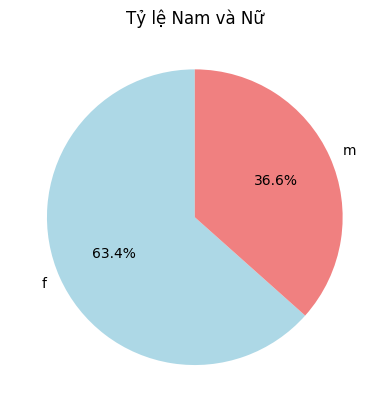

In [23]:
import matplotlib.pyplot as plt

# Tính số lượng Nam và Nữ bằng value_counts
gender_count = df["Gender"].value_counts()

# Vẽ biểu đồ pie
plt.pie(gender_count, labels=gender_count.index, 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Thêm tiêu đề
plt.title('Tỷ lệ Nam và Nữ')

# Hiển thị biểu đồ
plt.show()


In [24]:
df['Full Name'] = df['First Name'] + df['Last Name']

In [25]:
df.head()

,level_0,index,Id,Age,Weight_kgs,First Name,Last Name,PulseRate,Gender,Lower_hour,Upper_hour,Full Name
0,0,0,1.0,56.0,70.0,Micky,Mous,72,m,00,06,MickyMous
1,1,15,1.0,56.0,70.0,Micky,Mous,69,m,06,12,MickyMous
2,2,30,1.0,56.0,70.0,Micky,Mous,71,m,12,18,MickyMous
3,3,46,2.0,34.0,70.0,Donald,Duck,85,f,00,06,DonaldDuck
4,4,61,2.0,34.0,70.0,Donald,Duck,84,f,06,12,DonaldDuck


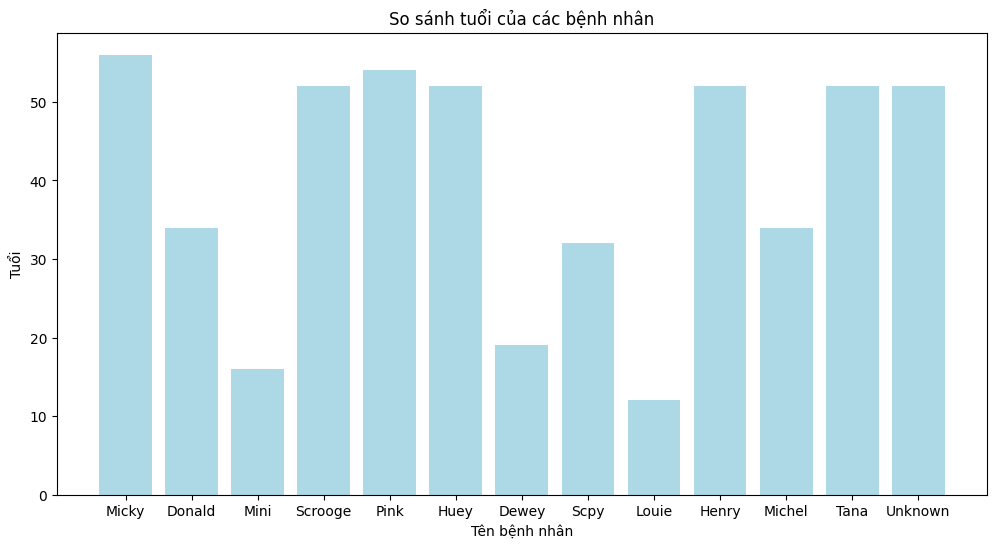

In [26]:
plt.figure(figsize=(12, 6))  # Thiết lập kích thước biểu đồ
plt.bar(df['First Name'], df['Age'], color='lightblue')
plt.title('So sánh tuổi của các bệnh nhân')
plt.xlabel('Tên bệnh nhân')
plt.ylabel('Tuổi')

plt.show()

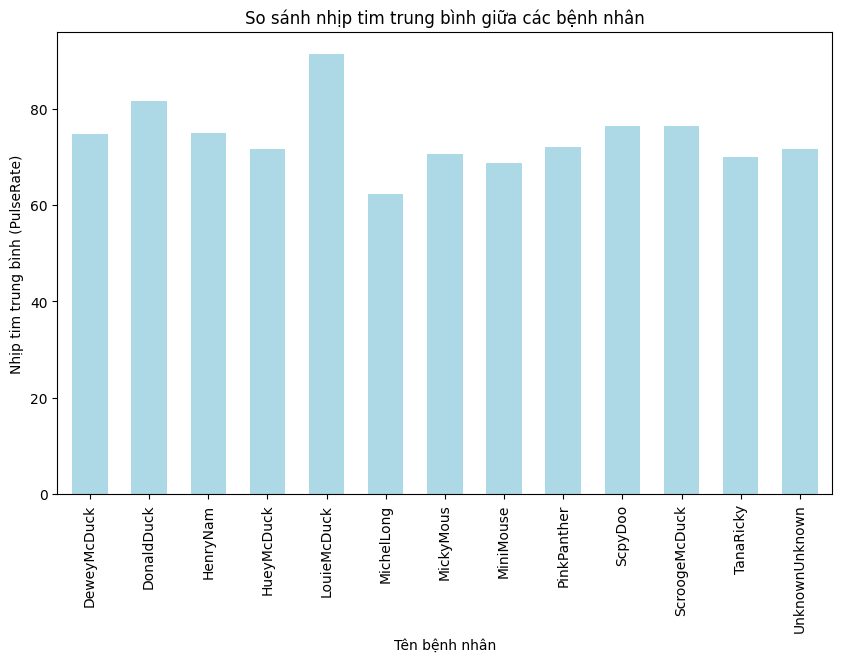

In [27]:
# Chuyển cột PulseRate sang kiểu số
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

average_pulse = df.groupby('Full Name')['PulseRate'].mean()

# Bước 2: Vẽ biểu đồ cột để so sánh nhịp tim trung bình giữa các bệnh nhân
plt.figure(figsize=(10, 6))
average_pulse.plot(kind='bar', color='lightblue', width=0.6)

# Bước 3: Thêm tiêu đề và nhãn cho các trục
plt.title('So sánh nhịp tim trung bình giữa các bệnh nhân')
plt.xlabel('Tên bệnh nhân')
plt.ylabel('Nhịp tim trung bình (PulseRate)')


plt.show()

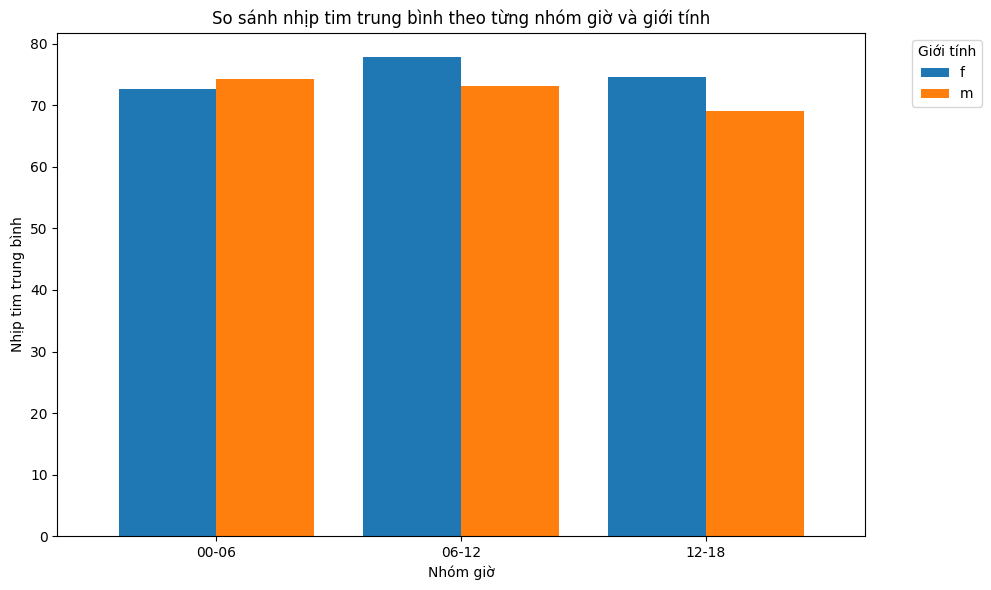

In [28]:


# Tạo cột 'Time_Group' nếu chưa có
df['Time_Group'] = df['Lower_hour'].astype(str) + '-' + df['Upper_hour'].astype(str)

# Tính nhịp tim trung bình theo nhóm giờ và giới tính
average_pulse_by_time_gender = df.groupby(['Time_Group', 'Gender'])['PulseRate'].mean().unstack()

# Vẽ biểu đồ
average_pulse_by_time_gender.plot(kind='bar', figsize=(10, 6), width=0.8)

# Tùy chỉnh biểu đồ
plt.title('So sánh nhịp tim trung bình theo từng nhóm giờ và giới tính')
plt.xlabel('Nhóm giờ')
plt.ylabel('Nhịp tim trung bình')
plt.xticks(rotation=0)
plt.legend(title='Giới tính', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


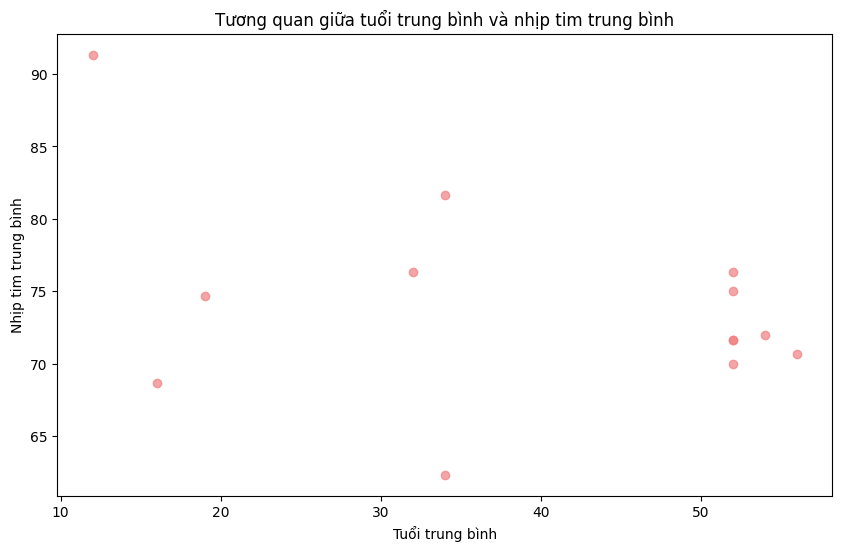

In [29]:
average_age = df.groupby('Full Name')['Age'].mean()  
average_pulse = df.groupby('Full Name')['PulseRate'].mean()  
plt.figure(figsize=(10, 6))
plt.scatter(average_age, average_pulse, color='lightcoral', alpha=0.7)

plt.title('Tương quan giữa tuổi trung bình và nhịp tim trung bình')
plt.xlabel('Tuổi trung bình')
plt.ylabel('Nhịp tim trung bình')
plt.show()

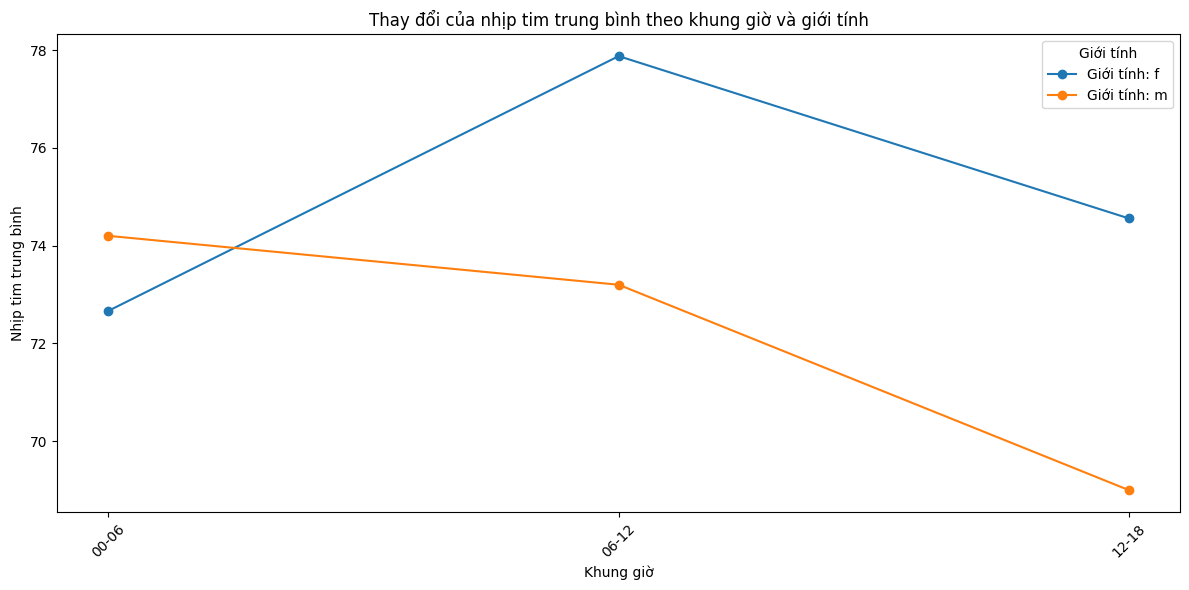

In [30]:
average_pulse_by_gender_time = df.groupby(['Gender', 'Lower_hour', 'Upper_hour'])['PulseRate'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Lặp qua các giới tính để vẽ biểu đồ đường cho từng giới tính
for gender in average_pulse_by_gender_time['Gender'].unique():
    # Lọc dữ liệu theo giới tính
    gender_data = average_pulse_by_gender_time[average_pulse_by_gender_time['Gender'] == gender]
    
    plt.plot(gender_data['Lower_hour'] + '-' + gender_data['Upper_hour'], gender_data['PulseRate'], label=f'Giới tính: {gender}', marker='o')

plt.title('Thay đổi của nhịp tim trung bình theo khung giờ và giới tính')
plt.xlabel('Khung giờ')
plt.ylabel('Nhịp tim trung bình')
plt.xticks(rotation=45)
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()